# Application of the fixed window method on the PARADIM-2

In [1]:
%run -i ../tomography/utils.py
%run -i startup2.py

Namespace: ['AzimuthalIntegrator', 'In', 'Out', 'ProgressBar', 'annotate_peaks', 'assign_Q_to_atlas', 'create_atlas', 'create_atlas_dask', 'create_dataset', 'dask', 'db_ana', 'db_csv', 'db_raw', 'df_uid', 'exit', 'get_ipython', 'get_vlim', 'mpl', 'np', 'pd', 'pixel_to_Q', 'plot_grain_maps', 'plot_real_aspect', 'plt', 'quit', 'reshape', 'reshape_to_matrix', 'set_real_aspect', 'tp', 'typing', 'xr']


## The methods to get grain maps

They are all based on the extracted peak positions from `trackpy`.

### The fill-in method (pseudo code)

```
map = an empty image

# peak i has intensities[i] on frame_index[i]
intensities = a list of intensity of the peak
frame_index = a list of index of frame

for index, intensity in zip(frame_index, intensities):
    position = get_position_on_map(index)
    map[position] = intensity
```

### The fixed window method (pseudo code)

```
frames = a series of diffraction image

center_pixel = the center pixel of the peak
width = the width of the peak
window = create_window(center_pixel, width)

map = an empty image
for index, frame in enumerate(frames):
    intensity = average(frame[window])
    position = get_position_on_map(index)
    map[position] = intensity
```

## Apply the method using dask

## Visualize the results

Visualize the results from the fixed window method and compare it with the filled in trackpy result.

In [2]:
# fixed window method
atlas1 = xr.load_dataset("data/fixed_window_method_example.nc")
atlas1 = atlas1.sortby(["x", "y"])

In [3]:
# the largest 10 Bragg peaks from PARADIM-2
tracks = db_csv.get_df("60b691d84523929818fb267d")
atlas2 = create_atlas(tracks)
atlas2 = atlas2.sortby(["x", "y"])

The (average) positions of the peaks on the images

In [6]:
df = atlas1[["x", "y"]].to_dataframe()
df

,x,y
grain,,
9220,97,1632
11674,111,1623
7875,114,1619
921,546,3211
7561,696,3207
7560,987,3703
83,1445,3363
6477,1447,3363
3220,1451,3363


### Fill-in method

The grain maps labeled by grain ID.

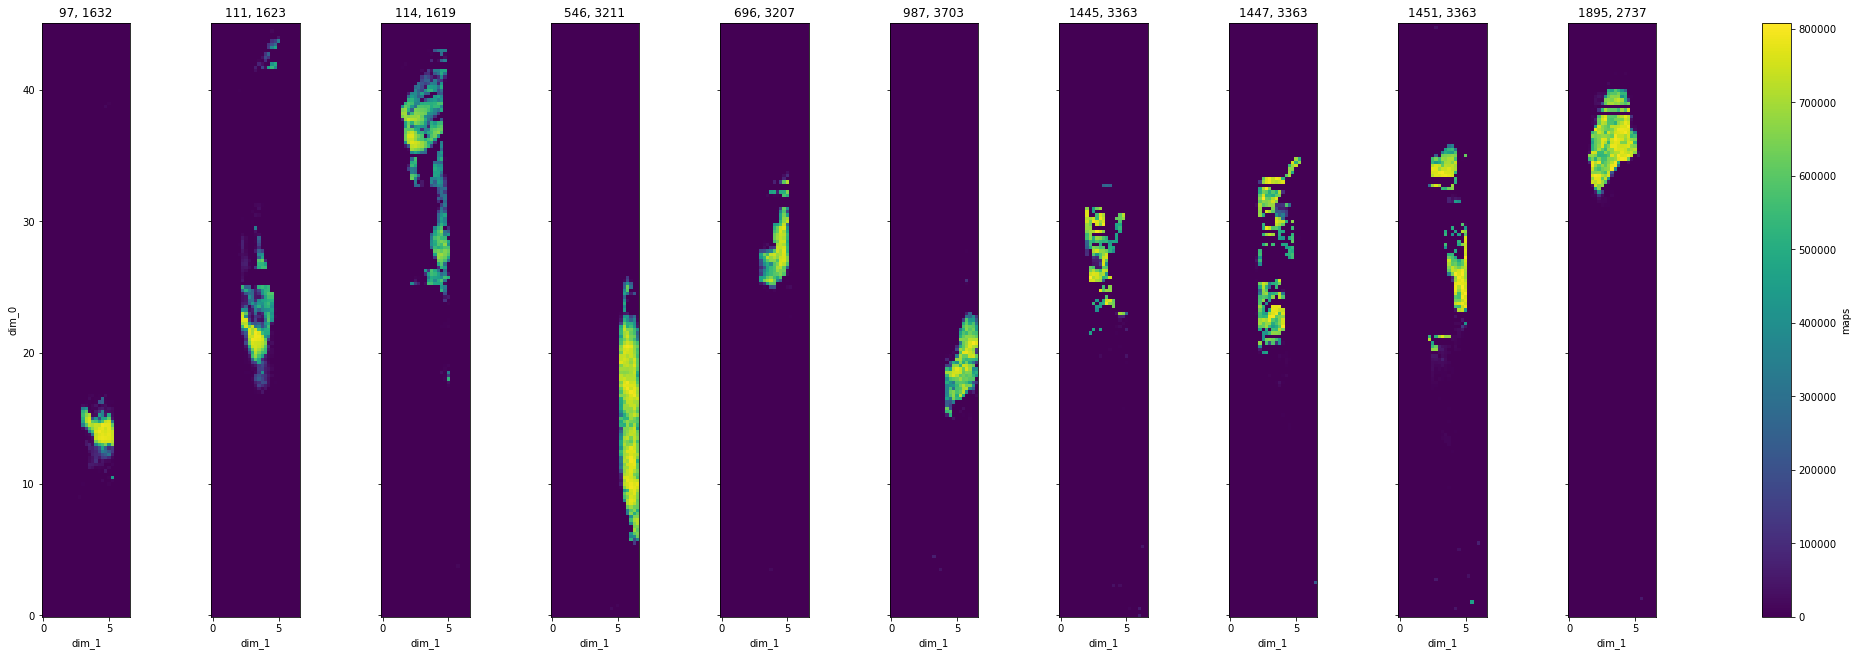

In [25]:
facet2 = plot_grain_maps(atlas2)
for ax, row in zip(facet2.axes.flatten(), df.itertuples()):
    ax.set_title("{}, {}".format(row.x, row.y))
facet2.fig.set_size_inches((15 * 2, 6 * 2))

### Fixed window method

The grain maps labeled by grain ID.

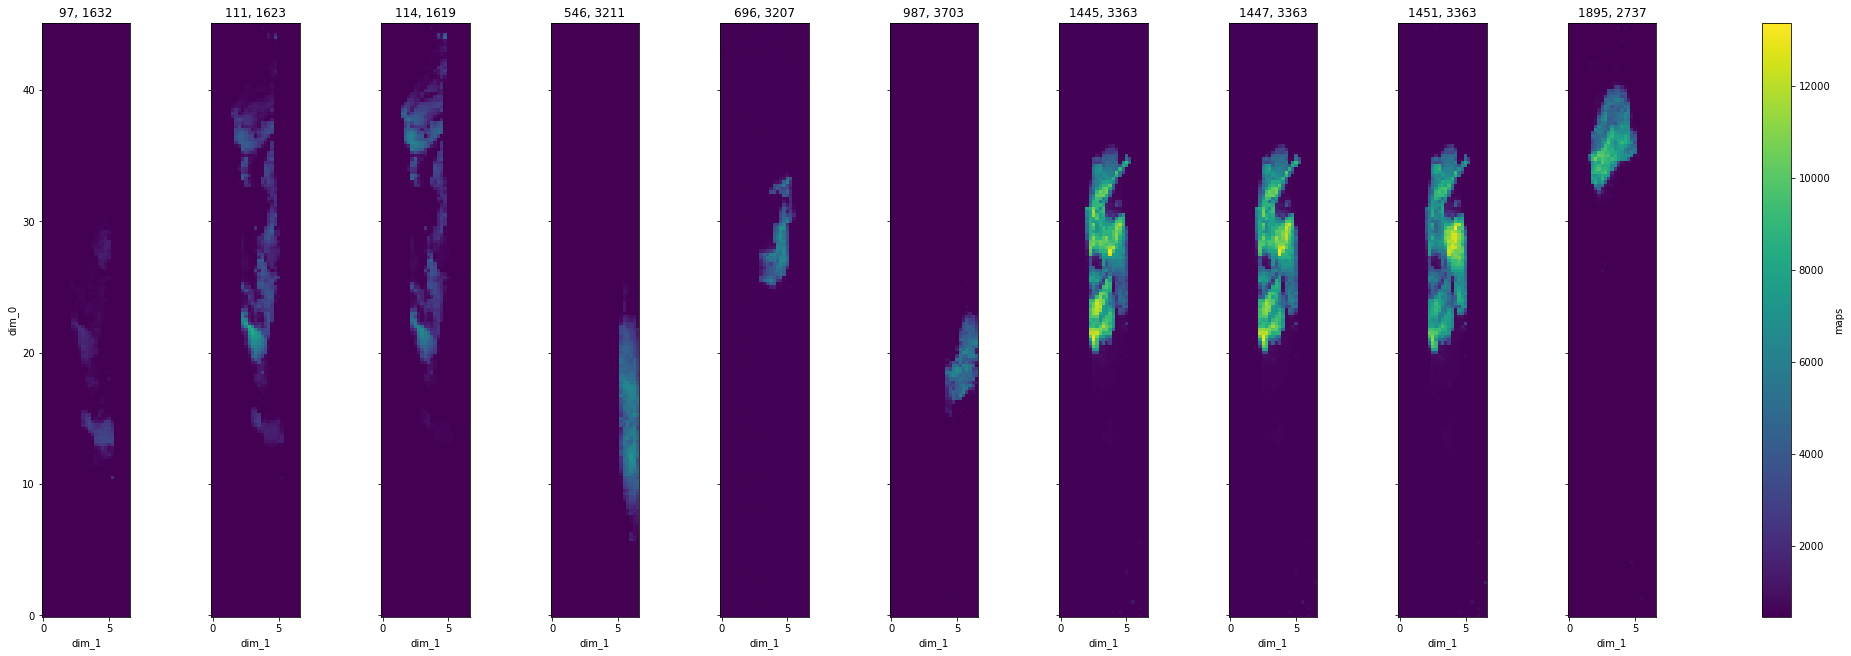

In [24]:
facet1 = plot_grain_maps(atlas1)
for ax, row in zip(facet1.axes.flatten(), df.itertuples()):
    ax.set_title("{}, {}".format(row.x, row.y))
facet1.fig.set_size_inches((15 * 2, 6 * 2))